# 파이썬과 함수 최적화만 사용하여 소프트 맥스 회귀 만들기

- 이 노트북 파일에서는 머신러닝, 딥러닝에 대한 기본 지식이 없이 심지어 머신러닝, 딥러닝 라이브러리를 사용하지 않고 로지스틱 회귀를 구현해 봅니다.

- 필요한 지식은 점과 회귀선의 차이를 줄인다는 것과 목적함수 식을 이해하는 것입니다.

- 또 사용하는 라이브러리는 구성된 목적함수를 최소화 하기 위한 `scipy.optimize.minimize`함수입니다.

- 중요한것은 최적화 이론 깊은 곳에서 일어나는 세부사항을 전혀 몰라도 괜찮다는 것입니다. 단지 사용하는 `minimize`함수가 주어진 함수의 함수값을 최소로 만들어 준다는 사실만 기억하세요.

- 그럼 시작 해보겠습니다!


### 모듈 임포트

- 파이썬 문법 시간에 배운대로 파이썬을 제대로 활용할려면 최소한의 외부 라이브러리가 필요합니다.

- 여기서는 그림을 그리기 위해 `matplotlib`와 함수를 최소화하기 위한 `minimize`, 손실함수 계산을 위한 `softmax` 함수를 임포트 하겠습니다.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.special import softmax

np.set_printoptions(precision=4, linewidth =150)

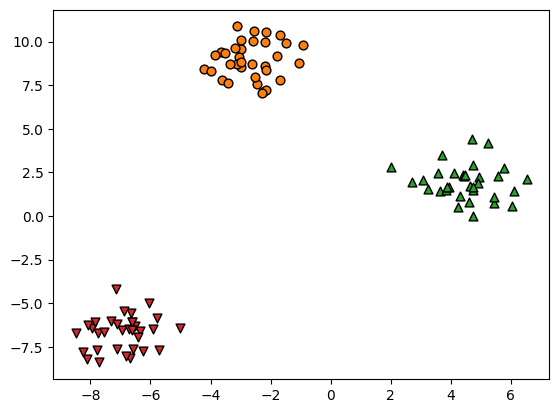

In [ ]:
# Step 1: Generate some 2D data points
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k')
ax.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k')
ax.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k')

plt.show()

D = {'data':X, 'target':y}

- 위 데이터에서 직선을 사용하여 주황, 빨강, 녹색점을 구분하고 싶습니다.

- 모델은 $ \mathbf{z} = W \mathbf{x}$가 될 것이며 여기서 $\mathbf{x}$는 점의 좌표를 담고 있는 길이 2짜리 벡터이고 $W$는 (3,2)인 행렬 입니다.

- $\mathbf{z}$는 모델의 출력인데 값 3개가 포함된 범위가 제한되지 않은 임의의 숫자가 될 것입니다.

- 따라서 아래와 같은 소프트맥스 함수를 이용해 모델의 출력을 0~1사이로 제한합니다.

$$
\mathbf{y} = \text{Softmax}(\mathbf{z})
$$

- 다음처럼 `Loss`클래스를 정의 합니다. 손실함수를 일반적인 `def func()`형태로 정의 하지 않고 클래스 형태로 정의하는 이유는 이 함수의 값을 구하기 위해서는 `X`와 `y`가 필요하기 때문입니다. 즉, 데이터가 필요합니다.

- 이 데이터를 클래스의 내부 자료로 가지고 있으면 좀 더 명확하게 손실 함수 코드를 작성할 수 있습니다.

- 손실함수 값은 다음처럼 계산됩니다.

$$
CE = \frac{1}{N}  \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(\hat{y}_{ij})
$$

- 위 식에서 $\hat{y}_{ij}$는 모델의 출력입니다. 모델의 출력은 샘플 하나당 숫자 3개로 구성되어 있음을 상기하세요.

- 위 식으로 부터 이제는 최적화 시켜야할 변수(parameter)가 3*2개라는 것을 알 수 있습니다.

- `__call__`함수를 정의해서 이 클래스로 부터 만들어진 객체가 callable하게 만들어 `minimize`함수가 마치 객체를 함수처럼 인식하도록 해야 합니다.


### 손실 함수

In [ ]:
# Step 2: Define the logistic regression model
class Loss:
    def __init__(self, D):
        # D로 부터 내부 변수로 X, y, N을 초기화
        self.X = D['data']
        self.y = D['target']
        self.N = len(self.X)
        self.C = len(np.unique(y))

    def __call__(self, w):
        """
        w: 매개변수 w0 ~ w_k가 포함된 리스트
        """
        loss = self.forward(w)
        return loss

    def forward(self, w):
        # w: (6,)->(3, 2)
        w = w.reshape(self.C, -1)

        # 모든 점에서 발생하는 에러를 저장할 리스트를 만듭니다.
        errors = []

        ########################################################################
        # WRITE YOUR CODE
        # 모든 점을 순회하면서
        for x, y in zip(self.X, self.y):
            # 모델로 예측값을 구합니다.


            # 정답자리의 -로그값으로 손실값(CE)을 계산



        # for 문을 마치고 나면 errors에 모든 에러값이 들어 있으므로
        # 이를 모두 더하고 N로 나눕니다.
        return None
        ########################################################################



In [ ]:
# 손실 함수 객체를 만들고
loss = Loss(D)

- `loss`객체에서 적당한 값을 대입하고 함수값이 잘 구해지는지 테스트해보겠습니다.

In [ ]:
w = np.random.randn(3, 2).reshape(-1)
loss(w)

10.707305694909717

### 최적화

- 이제 적당히 초기 `w`값을 잡고 `minimize`함수를 실행하면 됩니다.

In [ ]:
# Step 3: Train the model using optimization

initial_w = np.random.randn(3, 2).reshape(-1)
result = None
optimal_w = None

In [ ]:
optimal_w.reshape(3, 2)

array([[-2.4922,  0.9126],
       [ 3.1815, -0.0225],
       [-2.2432, -1.8134]])

[0 1 2]


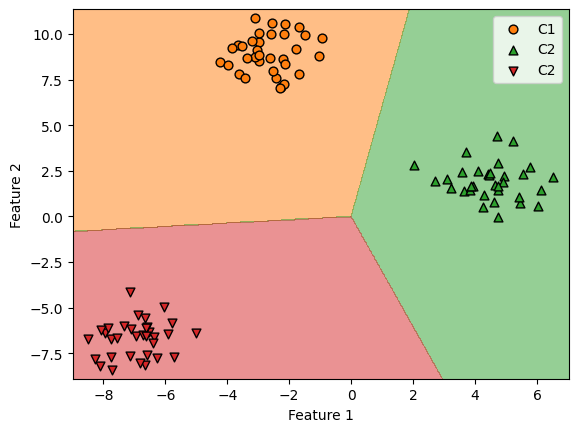

In [ ]:
# Step 4: Predict and visualize
def predict(X, w):
    ############################################################################
    # WRITE YOUR CODE
    z = None
    return None
    ############################################################################

# Generate a grid of points to plot decision boundary
eps = 0.5
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

preds = predict(grid, optimal_w.reshape(3,2))
preds = preds.reshape(xx.shape)

# Plot data points and decision boundary
plt.contourf(xx, yy, preds, alpha=0.5,  levels=[-0.5, 0.5, 1.5, 2.5], colors=['C1', 'C2', 'C3'])

plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='o', s=40, color='C1', edgecolor='k', label='C1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='^', s=40, color='C2', edgecolor='k', label='C2')
plt.scatter(X[y==2][:,0], X[y==2][:,1], marker='v', s=40, color='C3', edgecolor='k', label='C2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()